[View in Colaboratory](https://colab.research.google.com/github/cassiass/keras-tensorflow/blob/master/Projeto_aula7.ipynb)

Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

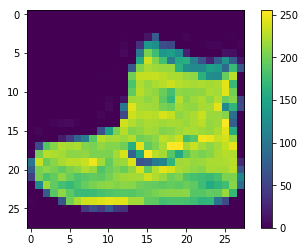

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [5]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [6]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
#     keras.layers.Dense(128, activation=tensorflow.nn.relu),
#     keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

W0728 16:07:50.619428  9828 deprecation.py:506] From C:\Users\Matheus\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 114us/sample - loss: 0.5326 - acc: 0.8120 - val_loss: 0.3974 - val_acc: 0.8548
Epoch 2/5
48000/48000 [==============================] - 5s 108us/sample - loss: 0.3997 - acc: 0.8548 - val_loss: 0.3787 - val_acc: 0.8623
Epoch 3/5
48000/48000 [==============================] - 5s 111us/sample - loss: 0.3619 - acc: 0.8672 - val_loss: 0.3399 - val_acc: 0.8759
Epoch 4/5
48000/48000 [==============================] - 6s 118us/sample - loss: 0.3398 - acc: 0.8742 - val_loss: 0.3585 - val_acc: 0.8683
Epoch 5/5
48000/48000 [==============================] - 6s 118us/sample - loss: 0.3235 - acc: 0.8808 - val_loss: 0.3517 - val_acc: 0.8738


Salvando e carregando o modelo treinado

In [7]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

W0728 16:08:18.935421  9828 deprecation.py:506] From C:\Users\Matheus\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0728 16:08:18.939744  9828 deprecation.py:506] From C:\Users\Matheus\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Visualizando as acurácias de treino e validação por época

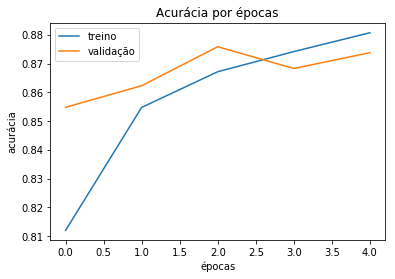

In [8]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

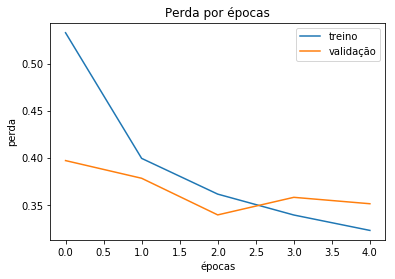

In [9]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [10]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2


Avaliando o modelo

In [11]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

10000/10000 [==============================] - 0s 39us/sample - loss: 54.2225 - acc: 0.8654
Perda do teste: 54.22252141304016
Acurácia do teste: 0.8654
